In [37]:
#import libraries
import pandas as pd
from pathlib import Path
import numpy as np

In [13]:
#import data
whales_csvpath = Path('/Users/Hockenbery/Downloads/Starter_Code 4/Resources/whale_navs.csv')
whales_df = pd.read_csv((whales_csvpath),
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True)

In [14]:
#review data
display(whales_df.head())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [15]:
#generate daily returns dataframe
daily_returns_df = whales_df.pct_change().dropna()

In [16]:
#review data
display(daily_returns_df.head())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


<AxesSubplot:title={'center':'Daily Returns of Investment Options'}, xlabel='date'>

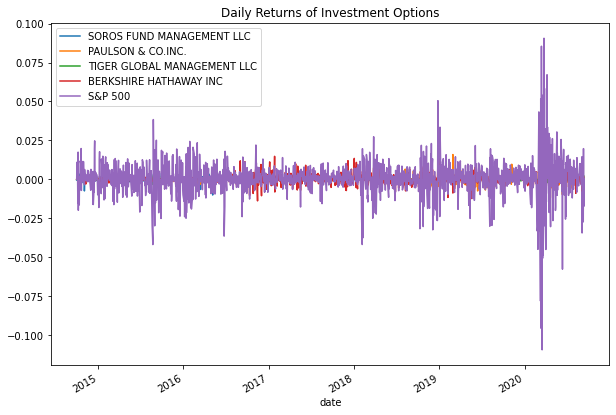

In [17]:
#plot daily returns
daily_returns_df.plot(figsize=(10, 7), title="Daily Returns of Investment Options")

In [23]:
#calculate cumulative returns
cum_returns_df = (1 + daily_returns_df).cumprod()

In [24]:
#review data
display(cum_returns_df.tail())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


<AxesSubplot:title={'center':'Cumulative Returns for Investment Options'}, xlabel='date'>

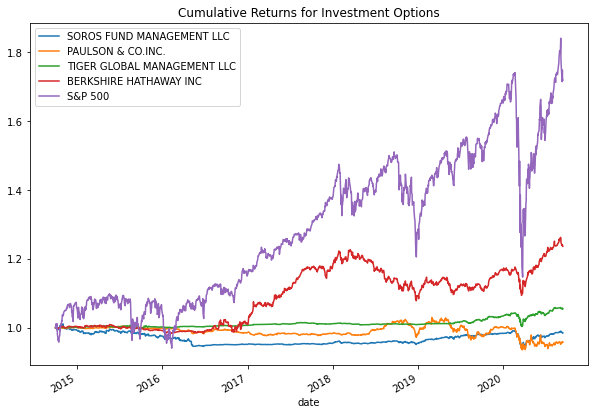

In [25]:
#plot cumulative returns
cum_returns_df.plot(figsize=(10, 7), title="Cumulative Returns for Investment Options")

In [27]:
#None of the investment options outperforms the S&P 500

<AxesSubplot:title={'center':'Daily Returns for Investment Options: Box and Whiskers'}>

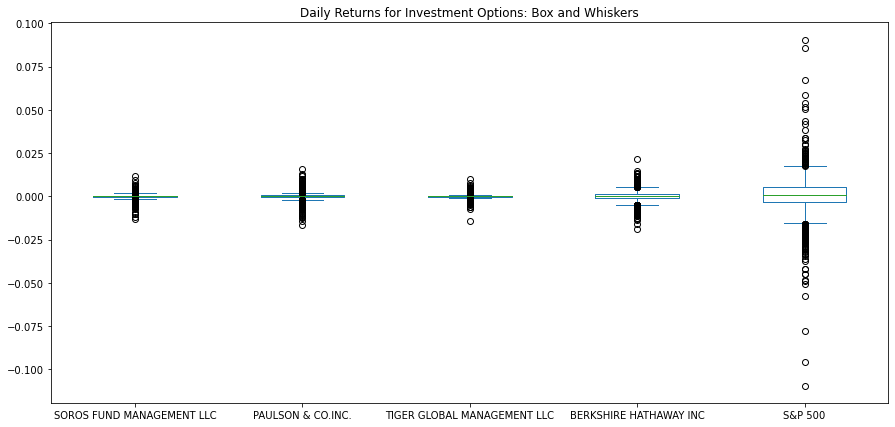

In [30]:
#generate box plot of daily returns to assess volatility
daily_returns_df.plot(kind='box', figsize=(15, 7), title='Daily Returns for Investment Options: Box and Whiskers')

In [31]:
#new data frame for 4 investment options using drop function
four_daily_returns_df = daily_returns_df.drop('S&P 500', axis=1)

<AxesSubplot:title={'center':'Daily Returns for 4 Investment Options: Box and Whiskers'}>

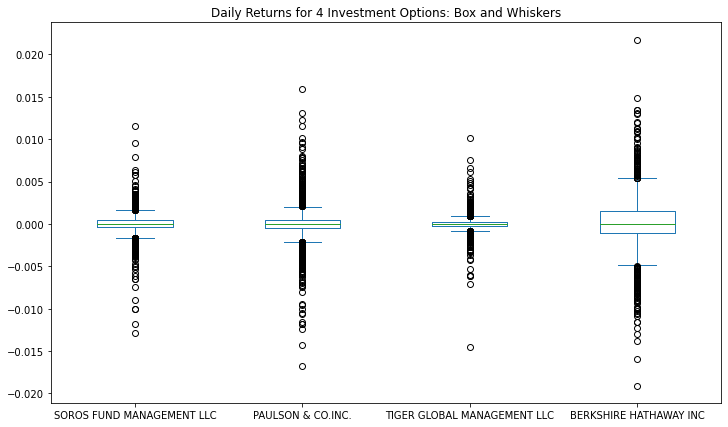

In [32]:
#generate box plot of daily returns for 4 investment options
four_daily_returns_df.plot(kind='box', figsize=(12, 7), title='Daily Returns for 4 Investment Options: Box and Whiskers')

In [ ]:
#Most volatile = Berkshire Hathaway; least volatile = Tiger Global Management

In [33]:
#calculate standard deviation of daily returns using pandas std function
standard_deviation = daily_returns_df.std()

In [34]:
standard_deviation.head()

SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
TIGER GLOBAL MANAGEMENT LLC    0.000996
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [35]:
#sort standard deviations in ascending order
standard_deviation_sorted = standard_deviation.sort_values()

In [36]:
standard_deviation_sorted.head()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [41]:
#calculate annualized standard deviation using sqrt function from numpy
annualized_standard_deviation = standard_deviation * np.sqrt(252)
annualized_standard_deviation.head()

SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
TIGER GLOBAL MANAGEMENT LLC    0.015804
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'21-day Rolling Average Standard Deviation'}, xlabel='date'>

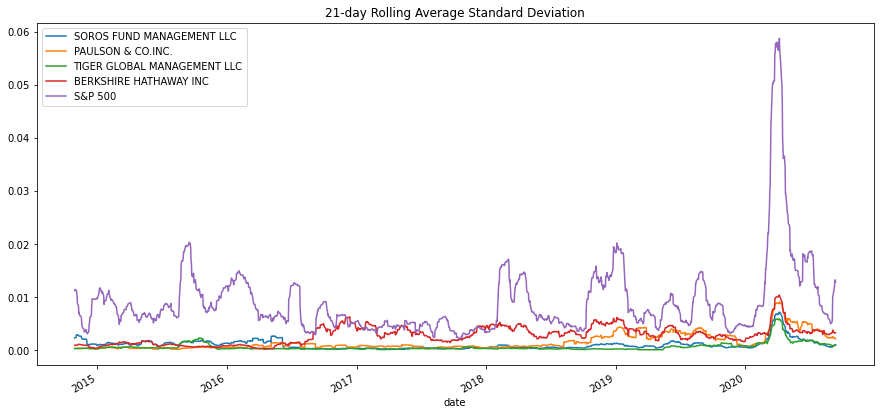

In [39]:
#plot 21-day rolling standard deviation for 4 investment options + S&P 500
daily_returns_df.rolling(window=21).std().plot(figsize=(15, 7), title='21-day Rolling Average Standard Deviation')

<AxesSubplot:title={'center':'21-day Rolling Average STD for 4 investment options'}, xlabel='date'>

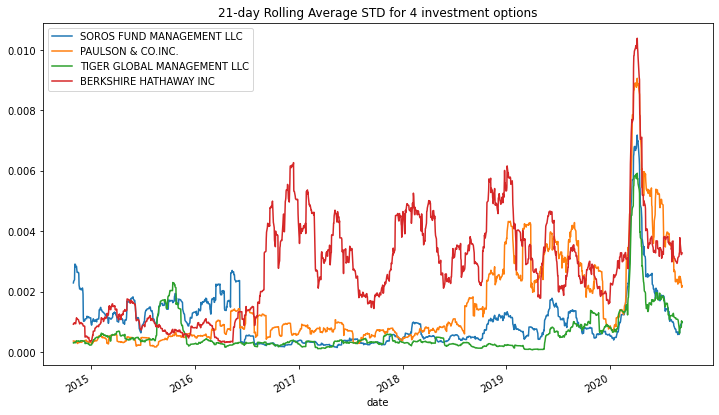

In [40]:
#plot 21-day rolling standard deviation for 4 investment options
four_daily_returns_df.rolling(window=21).std().plot(figsize=(12, 7), title='21-day Rolling Average STD for 4 investment options')

In [ ]:
#based on annualized standard deviation, none of the 4 investment options carries a higher risk than the S&P 500

In [ ]:
#based on 21-day rolling average standard deviation, only some of the time do the 4 investment options mirror the S&P 500

In [ ]:
#based on 21-day rolling average standard deviation, Berkshire Hathaway poses the most risk, but only after mid-2016

In [42]:
#calculate annualized average return for 4 investment options and S&P 500
annualized_average_return = daily_returns_df.mean() * 252

In [43]:
#sort annualized average returns
annualized_average_return_sorted = annualized_average_return.sort_values()

In [44]:
annualized_average_return_sorted.head()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [45]:
#calculate Sharpe ratios
sharpe_ratios = annualized_average_return / annualized_standard_deviation

In [46]:
#sort Sharpe ratios
sharpe_ratios_sorted = sharpe_ratios.sort_values()

In [47]:
sharpe_ratios_sorted.head()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios for 4 investment options and S&P 500'}>

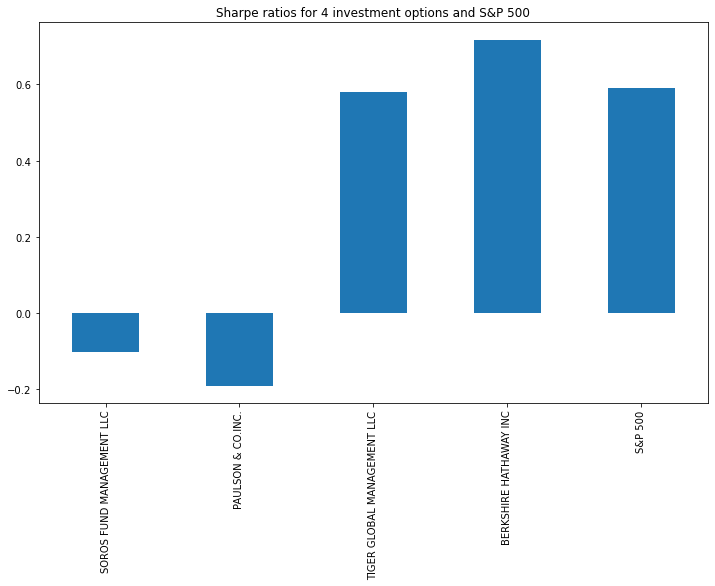

In [48]:
#plot Sharpe ratios in bar chart
sharpe_ratios.plot.bar(figsize=(12, 7), title='Sharpe ratios for 4 investment options and S&P 500')

In [ ]:
#Berkshire Hathaway has the best risk-return profile and Paulson & Co has the worst.

In [54]:
#calculate variance for S&P 500 using 60-day rolling window
market_rolling_60_var = daily_returns_df['S&P 500'].rolling(window=60).var()

In [55]:
#review data
market_rolling_60_var.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

In [61]:
#calculate covariance for Berkshire Hathaway and S&P 500
covariance_BH = daily_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns_df['S&P 500'])

In [62]:
#review data
covariance_BH.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [63]:
#calculate covariance for Tiger Global Management and S&P 500
covariance_Tiger = daily_returns_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_returns_df['S&P 500'])

In [64]:
covariance_Tiger.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [76]:
#calculate beta for Berkshire Hathaway using 60-day rolling window
BK_beta = covariance_BH / market_rolling_60_var

In [77]:
BK_beta

date
2014-10-02         NaN
2014-10-03         NaN
2014-10-06         NaN
2014-10-07         NaN
2014-10-08         NaN
                ...   
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
Length: 1497, dtype: float64

In [72]:
# calculate beta for Tiger Global Management using 60-day rolling window
Tiger_beta = covariance_Tiger / market_rolling_60_var

In [73]:
Tiger_beta

date
2014-10-02         NaN
2014-10-03         NaN
2014-10-06         NaN
2014-10-07         NaN
2014-10-08         NaN
                ...   
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
Length: 1497, dtype: float64

In [78]:
BK_beta_mean = BK_beta.mean()

In [79]:
display(BK_beta_mean)

0.2214986101354593

In [81]:
Tiger_beta_mean = Tiger_beta.mean()

In [82]:
display(Tiger_beta_mean)

0.03093001487238774

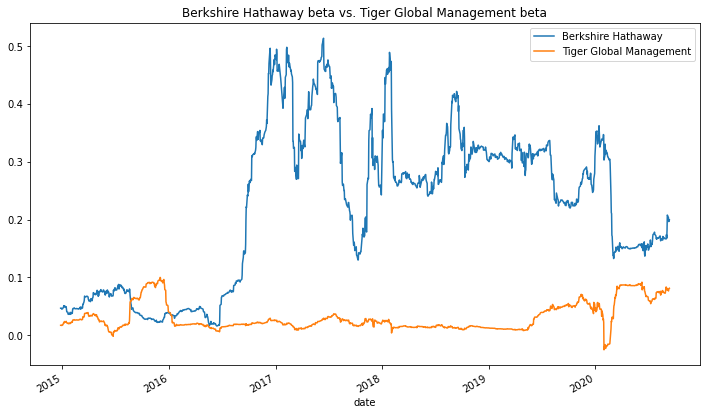

In [85]:
# plot beta for Berkshire Hathaway and Tiger Global Management
ax = BK_beta.plot(figsize=(12, 7), title='Berkshire Hathaway beta vs. Tiger Global Management beta')
Tiger_beta.plot(ax=ax)
ax.legend(['Berkshire Hathaway', 'Tiger Global Management'])

In [ ]:
#Berkshire Hathaway is more sensitive to movements in S&P 500 
#I recommend including Berkshire Hathaway in the suite of fund offeringd due in part to it's higher Sharpe ratio